# Project 3
Artjom, Heidi, Kaja, Rasmus

For Spark ML tasks is needed to create cluster with ML flavor. We are using **10.5 ML** which includes Apache Spark 3.2.1 and Scala 2.12.

## 1. Download data from kaggle and unzip

In [0]:
#%sh pip install kaggle
#export KAGGLE_USERNAME="rasmus55"
#export KAGGLE_KEY=""
#kaggle datasets download -d yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018
#unzip airline-delay-and-cancellation-data-2009-2018.zip

  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73053 sha256=19159d59fc4fd18b4b07f22dd7d70e1b032d745f4281ebeade1c405bca79c236
  Stored in directory: /root/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.

  0%|          | 0.00/1.95G [00:00<?, ?B/s]
  0%|          | 3.00M/1.95G [00:00<01:10, 29.6MB/s]
  0%|          | 7.00M/1.95G [00:00<00:59, 34.9MB/s]
  1%|          | 11.0M/1.95G [00:00<00:56, 36.7MB/s]
  1%|          | 17.0M/1.95G [00:00<00:45, 45.6MB/s]
  1%|▏         | 25.0M/1.95G [00:00<00:42, 48.5MB/s]
  2%|▏         | 31.0M/1.95G [00:00<00:40, 50.7MB/s]
  2%|▏         | 39.0M/1.95G [00:00<00:34, 58.9MB/s]
  2%|▏         | 45.0M/1.95G [00:01<00:44, 46.2MB/s]
  3%|▎         | 50.0M/1.95G [00:01<00:43, 47.2MB/s]
  3%|▎         | 57.0M/1.95G [00:01<00:45, 44.8MB/s]
  3%|▎         | 65.0M/1.95G [00

In [0]:
#path=['file:/databricks/driver/2009.csv', 'file:/databricks/driver/2010.csv', 'file:/databricks/driver/2011.csv', 'file:/databricks/driver/2012.csv', 'file:/databricks/driver/2013.csv', 'file:/databricks/driver/2014.csv', 'file:/databricks/driver/2015.csv']
#df = sqlContext.read.format("csv").option("header", "true").option("inferSchema", "true").load(path)
#dbutils.fs.mkdirs("dbfs:/tmp/data/proj3")
#df.write.option("header",True).csv("dbfs:/tmp/data/proj3/airline2.csv")

In [0]:
from pyspark.mllib.linalg import Vectors
from pyspark.ml.param import Param, Params
from pyspark.ml.feature import OneHotEncoder, VectorAssembler, StringIndexer
from pyspark.ml import Pipeline
import pandas as pd
import numpy as np
from pyspark.sql.functions import *

Read in the data into df

In [0]:
df = spark.read.option("header", True).csv("dbfs:/tmp/data/proj3/airline2.csv")

In [0]:
display(df)

FL_DATE OP_CARRIER OP_CARRIER_FL_NUM ORIGIN DEST CRS_DEP_TIME DEP_TIME DEP_DELAY TAXI_OUT WHEELS_OFF WHEELS_ON TAXI_IN CRS_ARR_TIME ARR_TIME ARR_DELAY CANCELLED CANCELLATION_CODE DIVERTED CRS_ELAPSED_TIME ACTUAL_ELAPSED_TIME AIR_TIME DISTANCE CARRIER_DELAY WEATHER_DELAY NAS_DELAY SECURITY_DELAY LATE_AIRCRAFT_DELAY Unnamed: 27 2009-01-01T00:00:00.000Z XE 1204 DCA EWR 1100.0 1058.0 -2.0 18.0 1116.0 1158.0 8.0 1202.0 1206.0 4.0 0.0 null 0.0 62.0 68.0 42.0 199.0 null null null null null null 2009-01-01T00:00:00.000Z XE 1206 EWR IAD 1510.0 1509.0 -1.0 28.0 1537.0 1620.0 4.0 1632.0 1624.0 -8.0 0.0 null 0.0 82.0 75.0 43.0 213.0 null null null null null null 2009-01-01T00:00:00.000Z XE 1207 EWR DCA 1100.0 1059.0 -1.0 20.0 1119.0 1155.0 6.0 1210.0 1201.0 -9.0 0.0 null 0.0 70.0 62.0 36.0 199.0 null null null null null null 2009-01-01T00:00:00.000Z XE 1208 DCA EWR 1240.0 1249.0 9.0 10.0 1259.0 1336.0 9.0 1357.0 1345.0 -12.0 0.0 null 0.0 77.0 56.0 37.0 199.0 null null null null null null 2009-01-01T00:00:00.000Z XE 1209 IAD EWR 1715.0 1705.0 -10.0 24.0 1729.0 1809.0 13.0 1900.0 1822.0 -38.0 0.0 null 0.0 105.0 77.0 40.0 213.0 null null null null null null 2009-01-01T00:00:00.000Z XE 1212 ATL EWR 1915.0 1913.0 -2.0 19.0 1932.0 2108.0 15.0 2142.0 2123.0 -19.0 0.0 null 0.0 147.0 130.0 96.0 745.0 null null null null null null 2009-01-01T00:00:00.000Z XE 1212 CLE ATL 1645.0 1637.0 -8.0 12.0 1649.0 1820.0 5.0 1842.0 1825.0 -17.0 0.0 null 0.0 117.0 108.0 91.0 554.0 null null null null null null 2009-01-01T00:00:00.000Z XE 1214 DCA EWR 1915.0 1908.0 -7.0 9.0 1917.0 1953.0 34.0 2035.0 2027.0 -8.0 0.0 null 0.0 80.0 79.0 36.0 199.0 null null null null null null 2009-01-01T00:00:00.000Z XE 1215 EWR DCA 1715.0 1710.0 -5.0 28.0 1738.0 1819.0 4.0 1838.0 1823.0 -15.0 0.0 null 0.0 83.0 73.0 41.0 199.0 null null null null null null 2009-01-01T00:00:00.000Z XE 1217 EWR DCA 1300.0 1255.0 -5.0 15.0 1310.0 1349.0 7.0 1408.0 1356.0 -12.0 0.0 null 0.0 68.0 61.0 39.0 199.0 null null null null null null 2009-01-01T00:00:00.000Z XE 1218 DCA EWR 1500.0 1457.0 -3.0 14.0 1511.0 1552.0 7.0 1620.0 1559.0 -21.0 0.0 null 0.0 80.0 62.0 41.0 199.0 null null null null null null 2009-01-01T00:00:00.000Z XE 1219 EWR DCA 2135.0 2131.0 -4.0 21.0 2152.0 2232.0 3.0 2252.0 2235.0 -17.0 0.0 null 0.0 77.0 64.0 40.0 199.0 null null null null null null 2009-01-01T00:00:00.000Z XE 1220 CLE DCA 1905.0 1855.0 -10.0 10.0 1905.0 1956.0 5.0 2025.0 2001.0 -24.0 0.0 null 0.0 80.0 66.0 51.0 310.0 null null null null null null 2009-01-01T00:00:00.000Z XE 1220 DCA EWR 2100.0 2049.0 -11.0 10.0 2059.0 2133.0 10.0 2217.0 2143.0 -34.0 0.0 null 0.0 77.0 54.0 34.0 199.0 null null null null null null 2009-01-01T00:00:00.000Z XE 1232 ORD EWR 905.0 900.0 -5.0 16.0 916.0 1144.0 6.0 1212.0 1150.0 -22.0 0.0 null 0.0 127.0 110.0 88.0 719.0 null null null null null null 2009-01-01T00:00:00.000Z XE 1233 EWR ORD 1000.0 1035.0 35.0 14.0 1049.0 1156.0 10.0 1139.0 1206.0 27.0 0.0 null 0.0 159.0 151.0 127.0 719.0 0.0 27.0 0.0 0.0 0.0 null 2009-01-01T00:00:00.000Z XE 1234 ORD EWR 1230.0 1234.0 4.0 8.0 1242.0 1511.0 14.0 1559.0 1525.0 -34.0 0.0 null 0.0 149.0 111.0 89.0 719.0 null null null null null null 2009-01-01T00:00:00.000Z XE 1235 EWR ORD 1343.0 1406.0 23.0 13.0 1419.0 1523.0 7.0 1523.0 1530.0 7.0 0.0 null 0.0 160.0 144.0 124.0 719.0 null null null null null null 2009-01-01T00:00:00.000Z XE 1236 ORD EWR 1630.0 1619.0 -11.0 19.0 1638.0 1906.0 35.0 2002.0 1941.0 -21.0 0.0 null 0.0 152.0 142.0 88.0 719.0 null null null null null null 2009-01-01T00:00:00.000Z XE 1237 EWR ORD 1930.0 1927.0 -3.0 16.0 1943.0 2049.0 8.0 2123.0 2057.0 -26.0 0.0 null 0.0 173.0 150.0 126.0 719.0 null null null null null null 2009-01-01T00:00:00.000Z XE 1266 EWR ATL 630.0 630.0 0.0 15.0 645.0 850.0 9.0 911.0 859.0 -12.0 0.0 null 0.0 161.0 149.0 125.0 745.0 null null null null null null 2009-01-01T00:00:00.000Z XE 2002 LFT IAH 1032.0 1025.0 -7.0 11.0 1036.0 1115.0 6.0 1134.0 1121.0 -13.0 0.0 null 0.0 62.0 56.0 39.0 201.0 null null null null 

## 2.Data preprocessing

#### 2.0 Select columns 
.. which make sense for predicting flight cancellation

In [0]:
COLUMNS = ["FL_DATE", # date of the flight
           "OP_CARRIER", # name of the carrier
           "ORIGIN", # beginning of the flight
           "DEST", # destination of the flight
           "CRS_DEP_TIME", # planned departure time
           "CRS_ARR_TIME", # planned arrival time
           "CANCELLED", # cancelled or not
           "CANCELLATION_CODE", # reason of the cancellation
           "DISTANCE" # flight distance (planned)
          ]

In [0]:
df = df.select(COLUMNS)
display(df)

FL_DATE OP_CARRIER ORIGIN DEST CRS_DEP_TIME CRS_ARR_TIME CANCELLED CANCELLATION_CODE DISTANCE 2010-01-01T00:00:00.000Z MQ LGA RDU 1940.0 2130.0 0.0 null 431.0 2010-01-01T00:00:00.000Z MQ DCA JFK 950.0 1100.0 0.0 null 213.0 2010-01-01T00:00:00.000Z MQ LGA RDU 900.0 1100.0 0.0 null 431.0 2010-01-01T00:00:00.000Z MQ RDU LGA 1940.0 2120.0 0.0 null 431.0 2010-01-01T00:00:00.000Z MQ JFK DCA 2035.0 2200.0 0.0 null 213.0 2010-01-01T00:00:00.000Z MQ DCA JFK 600.0 710.0 0.0 null 213.0 2010-01-01T00:00:00.000Z MQ RDU LGA 1745.0 1930.0 0.0 null 431.0 2010-01-01T00:00:00.000Z MQ DCA JFK 1425.0 1545.0 0.0 null 213.0 2010-01-01T00:00:00.000Z MQ DCA JFK 1605.0 1730.0 0.0 null 213.0 2010-01-01T00:00:00.000Z MQ JFK DCA 1615.0 1750.0 0.0 null 213.0 2010-01-01T00:00:00.000Z MQ DCA JFK 2025.0 2140.0 0.0 null 213.0 2010-01-01T00:00:00.000Z MQ JFK DCA 2235.0 2355.0 0.0 null 213.0 2010-01-01T00:00:00.000Z MQ LGA BOS 645.0 750.0 0.0 null 185.0 2010-01-01T00:00:00.000Z MQ JFK DCA 1025.0 1145.0 0.0 null 213.0 2010-01-01T00:00:00.000Z MQ LGA BOS 1905.0 2020.0 0.0 null 185.0 2010-01-01T00:00:00.000Z MQ RDU LGA 1840.0 2025.0 0.0 null 431.0 2010-01-01T00:00:00.000Z MQ DCA JFK 1155.0 1300.0 0.0 null 213.0 2010-01-01T00:00:00.000Z MQ LGA RDU 1250.0 1435.0 0.0 null 431.0 2010-01-01T00:00:00.000Z MQ DCA BOS 1230.0 1355.0 0.0 null 399.0 2010-01-01T00:00:00.000Z MQ LGA RDU 1620.0 1810.0 0.0 null 431.0 2010-01-01T00:00:00.000Z MQ DCA BOS 1815.0 1940.0 0.0 null 399.0 2010-01-01T00:00:00.000Z MQ LGA BNA 1110.0 1250.0 0.0 null 764.0 2010-01-01T00:00:00.000Z MQ LGA DTW 1430.0 1645.0 0.0 null 501.0 2010-01-01T00:00:00.000Z MQ RDU LGA 1125.0 1305.0 0.0 null 431.0 2010-01-01T00:00:00.000Z MQ BOS RDU 1720.0 1930.0 0.0 null 612.0 2010-01-01T00:00:00.000Z MQ LGA BOS 2040.0 2145.0 0.0 null 185.0 2010-01-01T00:00:00.000Z MQ BOS LGA 1015.0 1135.0 0.0 null 185.0 2010-01-01T00:00:00.000Z MQ LGA CLE 1825.0 2010.0 0.0 null 418.0 2010-01-01T00:00:00.000Z MQ BOS LGA 855.0 1015.0 0.0 null 185.0 2010-01-01T00:00:00.000Z MQ LGA BOS 1700.0 1810.0 0.0 null 185.0 2010-01-01T00:00:00.000Z MQ BOS LGA 1835.0 2000.0 0.0 null 185.0 2010-01-01T00:00:00.000Z MQ LGA BOS 1329.0 1440.0 0.0 null 185.0 2010-01-01T00:00:00.000Z MQ JFK DCA 1830.0 2000.0 0.0 null 213.0 2010-01-01T00:00:00.000Z MQ LGA CRW 1845.0 2050.0 0.0 null 444.0 2010-01-01T00:00:00.000Z MQ CMH LGA 1805.0 1950.0 0.0 null 478.0 2010-01-01T00:00:00.000Z MQ JFK DCA 830.0 1000.0 0.0 null 213.0 2010-01-01T00:00:00.000Z MQ BOS LGA 1635.0 1800.0 0.0 null 185.0 2010-01-01T00:00:00.000Z MQ LGA XNA 1445.0 1730.0 0.0 null 1147.0 2010-01-01T00:00:00.000Z MQ CMH LGA 1145.0 1330.0 0.0 null 478.0 2010-01-01T00:00:00.000Z MQ CLE LGA 1710.0 1850.0 0.0 null 418.0 2010-01-01T00:00:00.000Z MQ RDU BOS 1325.0 1515.0 0.0 null 612.0 2010-01-01T00:00:00.000Z MQ BOS DCA 1715.0 1905.0 0.0 null 399.0 2010-01-01T00:00:00.000Z MQ DCA BNA 1930.0 2030.0 0.0 null 562.0 2010-01-01T00:00:00.000Z MQ BDL RDU 630.0 830.0 0.0 null 532.0 2010-01-01T00:00:00.000Z MQ RDU BOS 1715.0 1910.0 0.0 null 612.0 2010-01-01T00:00:00.000Z MQ BOS RDU 1400.0 1610.0 0.0 null 612.0 2010-01-01T00:00:00.000Z MQ RDU JFK 1805.0 1955.0 0.0 null 426.0 2010-01-01T00:00:00.000Z MQ BOS RDU 1530.0 1740.0 0.0 null 612.0 2010-01-01T00:00:00.000Z MQ CMH BOS 825.0 1020.0 0.0 null 640.0 2010-01-01T00:00:00.000Z MQ RDU JFK 1615.0 1800.0 0.0 null 426.0 2010-01-01T00:00:00.000Z MQ LGA CMH 1829.0 2025.0 0.0 null 478.0 2010-01-01T00:00:00.000Z MQ CMH LGA 1515.0 1705.0 0.0 null 478.0 2010-01-01T00:00:00.000Z MQ BOS CMH 1730.0 1950.0 0.0 null 640.0 2010-01-01T00:00:00.000Z MQ BOS RDU 1115.0 1325.0 0.0 null 612.0 2010-01-01T00:00:00.000Z MQ RDU BOS 1035.0 1225.0 0.0 null 612.0 2010-01-01T00:00:00.000Z MQ BOS DCA 845.0 1030.0 0.0 null 399.0 2010-01-01T00:00:00.000Z MQ LGA BNA 830.0 1010.0 0.0 null 764.0 2010-01-01T00:00:00.000Z MQ RDU BDL 1500.0 1640.0 0.0 null 532.0 2010-01-01T00:00:00.000Z MQ BOS RDU 2005.0 2210.0 0.0 null 612.0 2010-01-01T00:00:00.000Z MQ LGA CMH 1540.0 1740.0 0.0 null 478.0 2010-01-01T00:00:0

#### 2.1. Fill CANCELLATION CODE null with "uncancel"
as the reason is missing because there was no cancellation

In [0]:
df = df.fillna("uncancel", subset='CANCELLATION_CODE')

#### 2.2 Drop null values

In [0]:
df = df.dropna(how='any')

In [0]:
display(df)

FL_DATE OP_CARRIER ORIGIN DEST CRS_DEP_TIME CRS_ARR_TIME CANCELLED CANCELLATION_CODE DISTANCE 2010-01-01T00:00:00.000Z MQ LGA RDU 1940.0 2130.0 0.0 uncancel 431.0 2010-01-01T00:00:00.000Z MQ DCA JFK 950.0 1100.0 0.0 uncancel 213.0 2010-01-01T00:00:00.000Z MQ LGA RDU 900.0 1100.0 0.0 uncancel 431.0 2010-01-01T00:00:00.000Z MQ RDU LGA 1940.0 2120.0 0.0 uncancel 431.0 2010-01-01T00:00:00.000Z MQ JFK DCA 2035.0 2200.0 0.0 uncancel 213.0 2010-01-01T00:00:00.000Z MQ DCA JFK 600.0 710.0 0.0 uncancel 213.0 2010-01-01T00:00:00.000Z MQ RDU LGA 1745.0 1930.0 0.0 uncancel 431.0 2010-01-01T00:00:00.000Z MQ DCA JFK 1425.0 1545.0 0.0 uncancel 213.0 2010-01-01T00:00:00.000Z MQ DCA JFK 1605.0 1730.0 0.0 uncancel 213.0 2010-01-01T00:00:00.000Z MQ JFK DCA 1615.0 1750.0 0.0 uncancel 213.0 2010-01-01T00:00:00.000Z MQ DCA JFK 2025.0 2140.0 0.0 uncancel 213.0 2010-01-01T00:00:00.000Z MQ JFK DCA 2235.0 2355.0 0.0 uncancel 213.0 2010-01-01T00:00:00.000Z MQ LGA BOS 645.0 750.0 0.0 uncancel 185.0 2010-01-01T00:00:00.000Z MQ JFK DCA 1025.0 1145.0 0.0 uncancel 213.0 2010-01-01T00:00:00.000Z MQ LGA BOS 1905.0 2020.0 0.0 uncancel 185.0 2010-01-01T00:00:00.000Z MQ RDU LGA 1840.0 2025.0 0.0 uncancel 431.0 2010-01-01T00:00:00.000Z MQ DCA JFK 1155.0 1300.0 0.0 uncancel 213.0 2010-01-01T00:00:00.000Z MQ LGA RDU 1250.0 1435.0 0.0 uncancel 431.0 2010-01-01T00:00:00.000Z MQ DCA BOS 1230.0 1355.0 0.0 uncancel 399.0 2010-01-01T00:00:00.000Z MQ LGA RDU 1620.0 1810.0 0.0 uncancel 431.0 2010-01-01T00:00:00.000Z MQ DCA BOS 1815.0 1940.0 0.0 uncancel 399.0 2010-01-01T00:00:00.000Z MQ LGA BNA 1110.0 1250.0 0.0 uncancel 764.0 2010-01-01T00:00:00.000Z MQ LGA DTW 1430.0 1645.0 0.0 uncancel 501.0 2010-01-01T00:00:00.000Z MQ RDU LGA 1125.0 1305.0 0.0 uncancel 431.0 2010-01-01T00:00:00.000Z MQ BOS RDU 1720.0 1930.0 0.0 uncancel 612.0 2010-01-01T00:00:00.000Z MQ LGA BOS 2040.0 2145.0 0.0 uncancel 185.0 2010-01-01T00:00:00.000Z MQ BOS LGA 1015.0 1135.0 0.0 uncancel 185.0 2010-01-01T00:00:00.000Z MQ LGA CLE 1825.0 2010.0 0.0 uncancel 418.0 2010-01-01T00:00:00.000Z MQ BOS LGA 855.0 1015.0 0.0 uncancel 185.0 2010-01-01T00:00:00.000Z MQ LGA BOS 1700.0 1810.0 0.0 uncancel 185.0 2010-01-01T00:00:00.000Z MQ BOS LGA 1835.0 2000.0 0.0 uncancel 185.0 2010-01-01T00:00:00.000Z MQ LGA BOS 1329.0 1440.0 0.0 uncancel 185.0 2010-01-01T00:00:00.000Z MQ JFK DCA 1830.0 2000.0 0.0 uncancel 213.0 2010-01-01T00:00:00.000Z MQ LGA CRW 1845.0 2050.0 0.0 uncancel 444.0 2010-01-01T00:00:00.000Z MQ CMH LGA 1805.0 1950.0 0.0 uncancel 478.0 2010-01-01T00:00:00.000Z MQ JFK DCA 830.0 1000.0 0.0 uncancel 213.0 2010-01-01T00:00:00.000Z MQ BOS LGA 1635.0 1800.0 0.0 uncancel 185.0 2010-01-01T00:00:00.000Z MQ LGA XNA 1445.0 1730.0 0.0 uncancel 1147.0 2010-01-01T00:00:00.000Z MQ CMH LGA 1145.0 1330.0 0.0 uncancel 478.0 2010-01-01T00:00:00.000Z MQ CLE LGA 1710.0 1850.0 0.0 uncancel 418.0 2010-01-01T00:00:00.000Z MQ RDU BOS 1325.0 1515.0 0.0 uncancel 612.0 2010-01-01T00:00:00.000Z MQ BOS DCA 1715.0 1905.0 0.0 uncancel 399.0 2010-01-01T00:00:00.000Z MQ DCA BNA 1930.0 2030.0 0.0 uncancel 562.0 2010-01-01T00:00:00.000Z MQ BDL RDU 630.0 830.0 0.0 uncancel 532.0 2010-01-01T00:00:00.000Z MQ RDU BOS 1715.0 1910.0 0.0 uncancel 612.0 2010-01-01T00:00:00.000Z MQ BOS RDU 1400.0 1610.0 0.0 uncancel 612.0 2010-01-01T00:00:00.000Z MQ RDU JFK 1805.0 1955.0 0.0 uncancel 426.0 2010-01-01T00:00:00.000Z MQ BOS RDU 1530.0 1740.0 0.0 uncancel 612.0 2010-01-01T00:00:00.000Z MQ CMH BOS 825.0 1020.0 0.0 uncancel 640.0 2010-01-01T00:00:00.000Z MQ RDU JFK 1615.0 1800.0 0.0 uncancel 426.0 2010-01-01T00:00:00.000Z MQ LGA CMH 1829.0 2025.0 0.0 uncancel 478.0 2010-01-01T00:00:00.000Z MQ CMH LGA 1515.0 1705.0 0.0 uncancel 478.0 2010-01-01T00:00:00.000Z MQ BOS CMH 1730.0 1950.0 0.0 uncancel 640.0 2010-01-01T00:00:00.000Z MQ BOS RDU 1115.0 1325.0 0.0 uncancel 612.0 2010-01-01T00:00:00.000Z MQ RDU BOS 1035.0 1225.0 0.0 uncancel 612.0 2010-01-01T00:00:00.000Z MQ BOS DCA 845.0 1030.0 0.0 uncancel 399.0 2010-01-01T00:00:00.000Z MQ LGA BNA 830.0 1010.0 0.0 

## 3.Data analysis

#### 3.1 Top 10 airlines by count

In [0]:
df.groupBy("OP_CARRIER").count().sort(desc("count")).show(10)

+----------+-------+
|OP_CARRIER|  count|
+----------+-------+
|        WN|8115099|
|        DL|5046291|
|        OO|4176455|
|        AA|3954500|
|        EV|3693024|
|        UA|3075545|
|        MQ|2920259|
|        US|2657286|
|        B6|1597832|
|        FL|1218389|
+----------+-------+
only showing top 10 rows



#### 3.2 Proportions of flight cancellation reasons

In [0]:
df_sub=df.filter(col('CANCELLATION_CODE')!='uncancel').select('CANCELLATION_CODE', col('FL_DATE').substr(0,4).alias('YEAR')).toPandas()

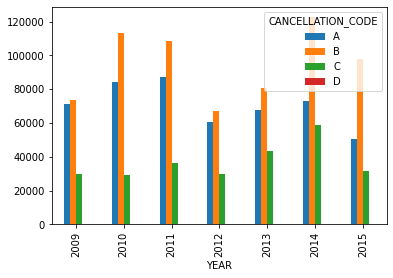

In [0]:
pd.pivot_table(df_sub, index='YEAR', columns='CANCELLATION_CODE', fill_value=0, aggfunc=np.count_nonzero).plot.bar();

## 4.Model predictions

#### 4.1 Data preparation for the model

Extracting the year, weekday and day of month for each flight

In [0]:
df = (df
             .withColumn("DATE", col('FL_DATE').substr(0,10))
             .withColumn("YEAR", col('FL_DATE').substr(0,4))
             .withColumn('DAY_OF_WEEK',dayofweek(col('DATE')))
             .withColumn('DAY_OF_MONTH',dayofmonth(col('DATE'))))

Transforming the departure and arrival time from format `1630` to `16` (e.g. leaving only hours)

In [0]:
df = (df
             .withColumn('DEP_HOUR',floor(col('CRS_DEP_TIME')/100))
             .withColumn('ARR_HOUR',floor(col('CRS_ARR_TIME')/100))
            )

In [0]:
COLUMNS = ["YEAR","DAY_OF_WEEK","DAY_OF_MONTH", # date of the flight
           "OP_CARRIER", # name of the carrier
           "ORIGIN", # beginning of the flight
           "DEST", # destination of the flight
           "DEP_HOUR", # planned departure hour
           "ARR_HOUR", # planned arrival hour
           "DISTANCE", # flight distance (planned)
           "CANCELLED" # cancelled or not
           #"CANCELLATION_CODE" # reason of the cancellation
          ]
df_X = df.select(COLUMNS)
display(df_X)

YEAR DAY_OF_WEEK DAY_OF_MONTH OP_CARRIER ORIGIN DEST DEP_HOUR ARR_HOUR DISTANCE CANCELLED 2010 6 1 MQ LGA RDU 19 21 431.0 0.0 2010 6 1 MQ DCA JFK 9 11 213.0 0.0 2010 6 1 MQ LGA RDU 9 11 431.0 0.0 2010 6 1 MQ RDU LGA 19 21 431.0 0.0 2010 6 1 MQ JFK DCA 20 22 213.0 0.0 2010 6 1 MQ DCA JFK 6 7 213.0 0.0 2010 6 1 MQ RDU LGA 17 19 431.0 0.0 2010 6 1 MQ DCA JFK 14 15 213.0 0.0 2010 6 1 MQ DCA JFK 16 17 213.0 0.0 2010 6 1 MQ JFK DCA 16 17 213.0 0.0 2010 6 1 MQ DCA JFK 20 21 213.0 0.0 2010 6 1 MQ JFK DCA 22 23 213.0 0.0 2010 6 1 MQ LGA BOS 6 7 185.0 0.0 2010 6 1 MQ JFK DCA 10 11 213.0 0.0 2010 6 1 MQ LGA BOS 19 20 185.0 0.0 2010 6 1 MQ RDU LGA 18 20 431.0 0.0 2010 6 1 MQ DCA JFK 11 13 213.0 0.0 2010 6 1 MQ LGA RDU 12 14 431.0 0.0 2010 6 1 MQ DCA BOS 12 13 399.0 0.0 2010 6 1 MQ LGA RDU 16 18 431.0 0.0 2010 6 1 MQ DCA BOS 18 19 399.0 0.0 2010 6 1 MQ LGA BNA 11 12 764.0 0.0 2010 6 1 MQ LGA DTW 14 16 501.0 0.0 2010 6 1 MQ RDU LGA 11 13 431.0 0.0 2010 6 1 MQ BOS RDU 17 19 612.0 0.0 2010 6 1 MQ LGA BOS 20 21 185.0 0.0 2010 6 1 MQ BOS LGA 10 11 185.0 0.0 2010 6 1 MQ LGA CLE 18 20 418.0 0.0 2010 6 1 MQ BOS LGA 8 10 185.0 0.0 2010 6 1 MQ LGA BOS 17 18 185.0 0.0 2010 6 1 MQ BOS LGA 18 20 185.0 0.0 2010 6 1 MQ LGA BOS 13 14 185.0 0.0 2010 6 1 MQ JFK DCA 18 20 213.0 0.0 2010 6 1 MQ LGA CRW 18 20 444.0 0.0 2010 6 1 MQ CMH LGA 18 19 478.0 0.0 2010 6 1 MQ JFK DCA 8 10 213.0 0.0 2010 6 1 MQ BOS LGA 16 18 185.0 0.0 2010 6 1 MQ LGA XNA 14 17 1147.0 0.0 2010 6 1 MQ CMH LGA 11 13 478.0 0.0 2010 6 1 MQ CLE LGA 17 18 418.0 0.0 2010 6 1 MQ RDU BOS 13 15 612.0 0.0 2010 6 1 MQ BOS DCA 17 19 399.0 0.0 2010 6 1 MQ DCA BNA 19 20 562.0 0.0 2010 6 1 MQ BDL RDU 6 8 532.0 0.0 2010 6 1 MQ RDU BOS 17 19 612.0 0.0 2010 6 1 MQ BOS RDU 14 16 612.0 0.0 2010 6 1 MQ RDU JFK 18 19 426.0 0.0 2010 6 1 MQ BOS RDU 15 17 612.0 0.0 2010 6 1 MQ CMH BOS 8 10 640.0 0.0 2010 6 1 MQ RDU JFK 16 18 426.0 0.0 2010 6 1 MQ LGA CMH 18 20 478.0 0.0 2010 6 1 MQ CMH LGA 15 17 478.0 0.0 2010 6 1 MQ BOS CMH 17 19 640.0 0.0 2010 6 1 MQ BOS RDU 11 13 612.0 0.0 2010 6 1 MQ RDU BOS 10 12 612.0 0.0 2010 6 1 MQ BOS DCA 8 10 399.0 0.0 2010 6 1 MQ LGA BNA 8 10 764.0 0.0 2010 6 1 MQ RDU BDL 15 16 532.0 0.0 2010 6 1 MQ BOS RDU 20 22 612.0 0.0 2010 6 1 MQ LGA CMH 15 17 478.0 0.0 2010 6 1 MQ CLE LGA 11 12 418.0 0.0 2010 6 1 MQ XNA LGA 10 14 1147.0 0.0 2010 6 1 MQ DTW LGA 17 19 501.0 0.0 2010 6 1 MQ DTW LGA 6 7 501.0 0.0 2010 6 1 MQ DCA JFK 13 14 213.0 0.0 2010 6 1 MQ DCA RDU 15 16 227.0 0.0 2010 6 1 MQ RDU BOS 19 21 612.0 0.0 2010 6 1 MQ LGA CLE 14 16 418.0 0.0 2010 6 1 MQ LGA CMH 20 22 478.0 0.0 2010 6 1 MQ LGA CMH 11 13 478.0 0.0 2010 6 1 MQ CMH LGA 13 15 478.0 0.0 2010 6 1 MQ DCA RDU 18 19 227.0 0.0 2010 6 1 MQ DTW LGA 15 17 501.0 1.0 2010 6 1 MQ BNA DCA 12 15 562.0 0.0 2010 6 1 MQ DCA BOS 15 17 399.0 0.0 2010 6 1 MQ BNA DCA 16 19 562.0 0.0 2010 6 1 MQ DCA BOS 19 20 399.0 0.0 2010 6 1 MQ BOS JFK 6 7 187.0 0.0 2010 6 1 MQ BNA DCA 18 20 562.0 0.0 2010 6 1 MQ JFK BOS 22 23 187.0 0.0 2010 6 1 MQ JFK BOS 8 9 187.0 0.0 2010 6 1 MQ LGA RDU 15 17 431.0 0.0 2010 6 1 MQ BOS JFK 8 9 187.0 0.0 2010 6 1 MQ JFK BOS 19 21 187.0 0.0 2010 6 1 MQ BOS JFK 19 20 187.0 0.0 2010 6 1 MQ JFK BOS 15 16 187.0 0.0 2010 6 1 MQ BOS JFK 17 19 187.0 0.0 2010 6 1 MQ LGA DTW 20 22 501.0 0.0 2010 6 1 MQ BOS JFK 12 14 187.0 0.0 2010 6 1 MQ RDU DCA 16 17 227.0 0.0 2010 6 1 MQ BOS JFK 9 11 187.0 0.0 2010 6 1 MQ DCA RDU 19 20 227.0 0.0 2010 6 1 MQ RDU DCA 6 7 227.0 0.0 2010 6 1 MQ RDU DCA 13 14 227.0 0.0 2010 6 1 MQ RDU DCA 12 13 227.0 0.0 2010 6 1 MQ JFK BOS 13 15 187.0 0.0 2010 6 1 MQ DCA RDU 8 9 227.0 0.0 2010 6 1 MQ BOS DCA 12 14 399.0 0.0 2010 6 1 MQ DCA BNA 15 16 562.0 0.0 2010 6 1 MQ BNA LGA 10 13 764.0 0.0 2010 6 1 MQ BNA LGA 13 16 764.0 0.0 2010 6 1 MQ JFK RDU 13 15 426.0 0.0 2010 6 1 MQ RDU JFK 13 15 426.0 0.0 2010 6 1 MQ BOS JFK 15 16 187.0 0.0 2010 6 1 MQ BDL RDU 17 18 532.0 0.0 2010 6 1 MQ JFK BOS 17 18 187.0 0.0 2010 6 1 MQ RDU DCA 10 11 227.0 0.0 2010 6 1 MQ DCA RDU 10 11 227.0 0.0 2010 6 1 MQ RDU JFK 7 9 426.0 0.0 2010 6 1 MQ 

Checking data formats

In [0]:
df_X.printSchema()

root
 |-- YEAR: string (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DEP_HOUR: long (nullable = true)
 |-- ARR_HOUR: long (nullable = true)
 |-- DISTANCE: string (nullable = true)
 |-- CANCELLED: string (nullable = true)



In [0]:
from pyspark.sql.types import StringType, IntegerType, DoubleType

df_X = (df_X
        .withColumn('YEAR', col("YEAR").cast(IntegerType()))
        .withColumn('DAY_OF_WEEK', col("DAY_OF_WEEK").cast(IntegerType()))
        .withColumn('DAY_OF_MONTH', col("DAY_OF_MONTH").cast(IntegerType()))
        .withColumn('DEP_HOUR', col("DEP_HOUR").cast(IntegerType()))
        .withColumn('ARR_HOUR', col("ARR_HOUR").cast(IntegerType()))
        .withColumn('DISTANCE', col("DISTANCE").cast(DoubleType()))
        .withColumn('CANCELLED', col("CANCELLED").cast(StringType()))
              )
df_X.printSchema()

root
 |-- YEAR: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DEP_HOUR: integer (nullable = true)
 |-- ARR_HOUR: integer (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CANCELLED: string (nullable = true)



There are 708 071 cancelled flights and 42M+ uncanceled flights. We undersample the dataframe by keeping ca. 708000 random records from uncanceled flights

In [0]:
display(df_X.groupby('CANCELLED').count())

CANCELLED count 1.0 708071 0.0 42343166

In [0]:
df_balanced = (df_X
               .filter(col('CANCELLED')!=1)
               .sample(fraction=708071/42343166)
               .union(df_X.filter(col('CANCELLED')==1))
              )
display(df_balanced.groupby('CANCELLED').count())

CANCELLED count 0.0 708412 1.0 708071

Smaller sample of the dataset to speed-up training and prediction

In [0]:
df_sample = df_balanced.sample(fraction=0.01)
display(df_sample.groupby('CANCELLED').count())

CANCELLED count 0.0 7048 1.0 6945

#### 4.2 Create pipeline

In [0]:
# NOMINAL_FEATURES = ['OP_CARRIER','ORIGIN', 'DEST']
# ORDINAL_FEATURES = ['YEAR', 'DAY_OF_WEEK', 'DAY_OF_MONTH']
CAT_FEATURES = ['OP_CARRIER'] #, 'ORIGIN', 'DEST']
stages = [] # stages in our Pipeline
for categoricalCol in CAT_FEATURES:
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + "Index")
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]

In [0]:
label_stringIdx =  StringIndexer(inputCol="CANCELLED", outputCol="label")
stages += [label_stringIdx]

In [0]:
NUMERIC_FEATURES = ['YEAR', 'DAY_OF_WEEK', 'DAY_OF_MONTH', "DEP_HOUR", "ARR_HOUR", "DISTANCE"]
assemblerInputs = [c + "classVec" for c in CAT_FEATURES] + NUMERIC_FEATURES
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [0]:
pipeline = Pipeline().setStages(stages)
pipelineModel = pipeline.fit(df_sample)
PreparedData = pipelineModel.transform(df_sample)

In [0]:
PreparedData.show(n=1, truncate=False, vertical=True)

-RECORD 0-----------------------------------------------------------------------------
 YEAR               | 2010                                                            
 DAY_OF_WEEK        | 6                                                               
 DAY_OF_MONTH       | 1                                                               
 OP_CARRIER         | MQ                                                              
 ORIGIN             | JFK                                                             
 DEST               | BOS                                                             
 DEP_HOUR           | 13                                                              
 ARR_HOUR           | 15                                                              
 DISTANCE           | 187.0                                                           
 CANCELLED          | 0.0                                                             
 OP_CARRIERIndex    | 3.0                  

#### 4.3 Train and test split

In [0]:
(trainingData, testData) = PreparedData.randomSplit([0.7, 0.3], seed=100)

#### 4.4 Training models

**Logistic regression**

In [0]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=10, regParam=0.1)
lrModel = lr.fit(trainingData)
predictions = lrModel.transform(testData)

In [0]:
display(predictions)

YEAR DAY_OF_WEEK DAY_OF_MONTH OP_CARRIER ORIGIN DEST DEP_HOUR ARR_HOUR DISTANCE CANCELLED OP_CARRIERIndex OP_CARRIERclassVec label features rawPrediction probability prediction 2009 1 6 EV GNV ATL 7 8 300.0 0.0 1.0 Map(vectorType -> sparse, length -> 20, indices -> List(1), values -> List(1.0)) 0.0 Map(vectorType -> sparse, length -> 26, indices -> List(1, 20, 21, 22, 23, 24, 25), values -> List(1.0, 2009.0, 1.0, 6.0, 7.0, 8.0, 300.0)) Map(vectorType -> dense, length -> 2, values -> List(-0.48257249067037833, 0.48257249067037833)) Map(vectorType -> dense, length -> 2, values -> List(0.3816448533003705, 0.6183551466996295)) 1.0 2009 1 13 OO MKE DEN 17 18 896.0 0.0 2.0 Map(vectorType -> sparse, length -> 20, indices -> List(2), values -> List(1.0)) 0.0 Map(vectorType -> sparse, length -> 26, indices -> List(2, 20, 21, 22, 23, 24, 25), values -> List(1.0, 2009.0, 1.0, 13.0, 17.0, 18.0, 896.0)) Map(vectorType -> dense, length -> 2, values -> List(-0.059977218299025026, 0.059977218299025026)) Map(vectorType -> dense, length -> 2, values -> List(0.4850101886849686, 0.5149898113150314)) 1.0 2009 1 13 UA CMH ORD 15 16 296.0 0.0 6.0 Map(vectorType -> sparse, length -> 20, indices -> List(6), values -> List(1.0)) 0.0 Map(vectorType -> sparse, length -> 26, indices -> List(6, 20, 21, 22, 23, 24, 25), values -> List(1.0, 2009.0, 1.0, 13.0, 15.0, 16.0, 296.0)) Map(vectorType -> dense, length -> 2, values -> List(-0.20959759548575363, 0.20959759548575363)) Map(vectorType -> dense, length -> 2, values -> List(0.4477915926213144, 0.5522084073786856)) 1.0 2009 1 20 9E MSP ATW 19 21 236.0 0.0 12.0 Map(vectorType -> sparse, length -> 20, indices -> List(12), values -> List(1.0)) 0.0 Map(vectorType -> sparse, length -> 26, indices -> List(12, 20, 21, 22, 23, 24, 25), values -> List(1.0, 2009.0, 1.0, 20.0, 19.0, 21.0, 236.0)) Map(vectorType -> dense, length -> 2, values -> List(-0.5169578612054266, 0.5169578612054266)) Map(vectorType -> dense, length -> 2, values -> List(0.37356386219280047, 0.6264361378071995)) 1.0 2009 1 20 AA DFW DEN 6 7 641.0 0.0 4.0 Map(vectorType -> sparse, length -> 20, indices -> List(4), values -> List(1.0)) 0.0 Map(vectorType -> sparse, length -> 26, indices -> List(4, 20, 21, 22, 23, 24, 25), values -> List(1.0, 2009.0, 1.0, 20.0, 6.0, 7.0, 641.0)) Map(vectorType -> dense, length -> 2, values -> List(-0.0772653065834703, 0.0772653065834703)) Map(vectorType -> dense, length -> 2, values -> List(0.4806932773766081, 0.5193067226233918)) 1.0 2009 1 20 WN CMH LAS 16 18 1772.0 0.0 0.0 Map(vectorType -> sparse, length -> 20, indices -> List(0), values -> List(1.0)) 0.0 Map(vectorType -> sparse, length -> 26, indices -> List(0, 20, 21, 22, 23, 24, 25), values -> List(1.0, 2009.0, 1.0, 20.0, 16.0, 18.0, 1772.0)) Map(vectorType -> dense, length -> 2, values -> List(0.6148327106698801, -0.6148327106698801)) Map(vectorType -> dense, length -> 2, values -> List(0.6490424189676177, 0.3509575810323823)) 0.0 2009 1 20 WN PHL PHX 10 12 2075.0 0.0 0.0 Map(vectorType -> sparse, length -> 20, indices -> List(0), values -> List(1.0)) 0.0 Map(vectorType -> sparse, length -> 26, indices -> List(0, 20, 21, 22, 23, 24, 25), values -> List(1.0, 2009.0, 1.0, 20.0, 10.0, 12.0, 2075.0)) Map(vectorType -> dense, length -> 2, values -> List(0.779384192494117, -0.779384192494117)) Map(vectorType -> dense, length -> 2, values -> List(0.6855473781484046, 0.3144526218515954)) 0.0 2009 1 27 NW MSP ORD 15 17 334.0 0.0 18.0 Map(vectorType -> sparse, length -> 20, indices -> List(18), values -> List(1.0)) 0.0 Map(vectorType -> sparse, length -> 26, indices -> List(18, 20, 21, 22, 23, 24, 25), values -> List(1.0, 2009.0, 1.0, 27.0, 15.0, 17.0, 334.0)) Map(vectorType -> dense, length -> 2, values -> List(0.4015273037922569, -0.4015273037922569)) Map(vectorType -> dense, length -> 2, values -> List(0.5990545558884869, 0.4009454441115131)) 0.0 2009 2 2 FL MCO MCI 11 12 1072.0 0.0 10.0 Map(vectorType -> sparse, length -> 20, indices -> List(10), values -> List(1.

In [0]:
lrModel.evaluate(testData).accuracy

Out[32]: 0.5984969255294922

**Decision tree classifier**

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(labelCol="label", featuresCol="features", seed=123)
dtModel = dt.fit(trainingData)
dt_predictions = dtModel.transform(testData)

In [0]:
display(dt_predictions
        .withColumn('correct', when(col("label")==col('prediction'),1).otherwise(0))
        .select(avg('correct').alias("Accuracy"))
       )

Accuracy 0.5889319061717149

**Random Forest**

In [0]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=10)
rfModel = rf.fit(trainingData)
rf_predictions = rfModel.transform(testData)

In [0]:
display(rf_predictions)

YEAR DAY_OF_WEEK DAY_OF_MONTH OP_CARRIER ORIGIN DEST DEP_HOUR ARR_HOUR DISTANCE CANCELLED OP_CARRIERIndex OP_CARRIERclassVec label features rawPrediction probability prediction 2009 1 6 9E ATL CLT 13 14 227.0 0.0 11.0 Map(vectorType -> sparse, length -> 20, indices -> List(11), values -> List(1.0)) 0.0 Map(vectorType -> sparse, length -> 26, indices -> List(11, 20, 21, 22, 23, 24, 25), values -> List(1.0, 2009.0, 1.0, 6.0, 13.0, 14.0, 227.0)) Map(vectorType -> dense, length -> 2, values -> List(4.663151987442285, 5.336848012557715)) Map(vectorType -> dense, length -> 2, values -> List(0.46631519874422855, 0.5336848012557714)) 1.0 2009 1 13 DL ATL LGA 11 13 761.0 0.0 5.0 Map(vectorType -> sparse, length -> 20, indices -> List(5), values -> List(1.0)) 0.0 Map(vectorType -> sparse, length -> 26, indices -> List(5, 20, 21, 22, 23, 24, 25), values -> List(1.0, 2009.0, 1.0, 13.0, 11.0, 13.0, 761.0)) Map(vectorType -> dense, length -> 2, values -> List(5.5187295731973345, 4.4812704268026655)) Map(vectorType -> dense, length -> 2, values -> List(0.5518729573197334, 0.44812704268026654)) 0.0 2009 1 13 DL ATL PBI 14 16 545.0 0.0 5.0 Map(vectorType -> sparse, length -> 20, indices -> List(5), values -> List(1.0)) 0.0 Map(vectorType -> sparse, length -> 26, indices -> List(5, 20, 21, 22, 23, 24, 25), values -> List(1.0, 2009.0, 1.0, 13.0, 14.0, 16.0, 545.0)) Map(vectorType -> dense, length -> 2, values -> List(5.953199374271263, 4.046800625728738)) Map(vectorType -> dense, length -> 2, values -> List(0.5953199374271263, 0.4046800625728738)) 0.0 2009 1 20 EV ATL GSP 22 23 153.0 0.0 1.0 Map(vectorType -> sparse, length -> 20, indices -> List(1), values -> List(1.0)) 0.0 Map(vectorType -> sparse, length -> 26, indices -> List(1, 20, 21, 22, 23, 24, 25), values -> List(1.0, 2009.0, 1.0, 20.0, 22.0, 23.0, 153.0)) Map(vectorType -> dense, length -> 2, values -> List(4.078695668516814, 5.921304331483186)) Map(vectorType -> dense, length -> 2, values -> List(0.4078695668516814, 0.5921304331483186)) 1.0 2009 1 20 NW MSP DCA 13 16 931.0 0.0 18.0 Map(vectorType -> sparse, length -> 20, indices -> List(18), values -> List(1.0)) 0.0 Map(vectorType -> sparse, length -> 26, indices -> List(18, 20, 21, 22, 23, 24, 25), values -> List(1.0, 2009.0, 1.0, 20.0, 13.0, 16.0, 931.0)) Map(vectorType -> dense, length -> 2, values -> List(5.809346266411586, 4.190653733588415)) Map(vectorType -> dense, length -> 2, values -> List(0.5809346266411586, 0.41906537335884153)) 0.0 2009 1 20 WN DEN BWI 18 23 1491.0 0.0 0.0 Map(vectorType -> sparse, length -> 20, indices -> List(0), values -> List(1.0)) 0.0 Map(vectorType -> sparse, length -> 26, indices -> List(0, 20, 21, 22, 23, 24, 25), values -> List(1.0, 2009.0, 1.0, 20.0, 18.0, 23.0, 1491.0)) Map(vectorType -> dense, length -> 2, values -> List(6.375312671565539, 3.6246873284344616)) Map(vectorType -> dense, length -> 2, values -> List(0.637531267156554, 0.36246873284344616)) 0.0 2009 1 20 WN MCO ALB 18 21 1073.0 0.0 0.0 Map(vectorType -> sparse, length -> 20, indices -> List(0), values -> List(1.0)) 0.0 Map(vectorType -> sparse, length -> 26, indices -> List(0, 20, 21, 22, 23, 24, 25), values -> List(1.0, 2009.0, 1.0, 20.0, 18.0, 21.0, 1073.0)) Map(vectorType -> dense, length -> 2, values -> List(6.273113589063536, 3.7268864109364643)) Map(vectorType -> dense, length -> 2, values -> List(0.6273113589063536, 0.3726886410936464)) 0.0 2009 1 27 WN OAK LAS 9 11 407.0 0.0 0.0 Map(vectorType -> sparse, length -> 20, indices -> List(0), values -> List(1.0)) 0.0 Map(vectorType -> sparse, length -> 26, indices -> List(0, 20, 21, 22, 23, 24, 25), values -> List(1.0, 2009.0, 1.0, 27.0, 9.0, 11.0, 407.0)) Map(vectorType -> dense, length -> 2, values -> List(6.116934112185327, 3.8830658878146727)) Map(vectorType -> dense, length -> 2, values -> List(0.6116934112185327, 0.3883065887814673)) 0.0 2009 2 2 HA HNL ITO 10 11 216.0 0.0 17.0 Map(vectorType -> sparse, length -> 20, indices -> List(17), values -> List(1.0)) 0.0 Map(vector

In [0]:
display(rf_predictions
        .withColumn('correct', when(col("label")==col('prediction'),1).otherwise(0))
        .select(avg('correct').alias("Accuracy"))
       )

Accuracy 0.6082230623818525

Exploring the importance of various features

In [0]:
cols = (rf_predictions
        .select(col('OP_CARRIER').alias('COL'),'OP_CARRIERIndex')
        .distinct()
        .orderBy('OP_CARRIERIndex')
        .select('COL')
        .withColumn("COL", concat(lit("OP_CARRIER_"), col("COL")))
       )

from pyspark.sql import Row

f = spark.createDataFrame(list(map(lambda x: Row(COL=x), NUMERIC_FEATURES)))

cols = cols.union(f).toPandas()

display(cols)

COL OP_CARRIER_WN OP_CARRIER_EV OP_CARRIER_OO OP_CARRIER_MQ OP_CARRIER_AA OP_CARRIER_DL OP_CARRIER_UA OP_CARRIER_US OP_CARRIER_B6 OP_CARRIER_XE OP_CARRIER_YV OP_CARRIER_9E OP_CARRIER_FL OP_CARRIER_AS OP_CARRIER_CO OP_CARRIER_OH OP_CARRIER_F9 OP_CARRIER_HA OP_CARRIER_NW OP_CARRIER_VX OP_CARRIER_NK YEAR DAY_OF_WEEK DAY_OF_MONTH DEP_HOUR ARR_HOUR DISTANCE

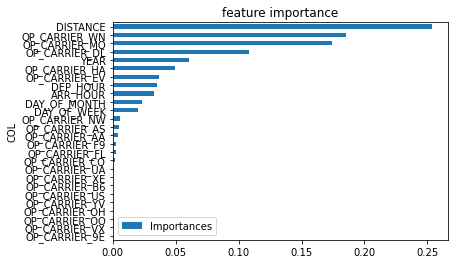

In [0]:
c = list(cols.COL.values)
c = c[:20]+c[21:] #last one-hot encoded CARRIER is out of scope 
pd.DataFrame({'COL':c, 'Importances': list(rfModel.featureImportances)}).sort_values(by=['Importances']).plot(kind='barh',x='COL',title='feature importance');  

**Gradient Boosted Trees**

In [0]:
from pyspark.ml.classification import GBTClassifier

gbt = GBTClassifier(labelCol="label", featuresCol="features")
gbtModel = gbt.fit(trainingData)
gbt_predictions = gbtModel.transform(testData)

In [0]:
display(gbt_predictions
        .withColumn('correct', when(col("label")==col('prediction'),1).otherwise(0))
        .select(avg('correct').alias("Accuracy"))
       )

Accuracy 0.6178547028011843

**Results: Accuracy:**
- Logistic Regression: ~59.8%
- Decision Tree Classifier: ~58.9%
- Random Forest Classifier: ~60.1%
- Gradient Boost Trees Classifier: ~61.8%

These accuracies is derived with fewer features we would have wanted to use, with smaller sample of data and using only the default hyperparameter values of the models. We are sure that we could increase the accuracy if we change the hyperparameters, if we use more features and more data, but we would need more computational power for it. This free Databricks version doesn't provide too much necessary sources.

<hr>
Ideas for improvements:
<hr>

We would have wanted to reduce the names of airports (IATAs): ORIGIN, DEST. We found the data for this from internet. With current ORIGIN and DEST the pipeline and trainings would have been enourmously long as with onehot encoder would have produced over 600 columns. Currently with sample of 1% of balanced data the pipeline creation took 15 min and training&prediction from 15 to 30 minutes. For better results we would need more data (the number of features, the number of samples). One way to get IATA data:

In [0]:
%sh pip install airportsdata

In [0]:
import airportsdata
airports = airportsdata.load('IATA')  # key is IATA code
airports['ATA'] #example

Out[80]: {'icao': 'SPHZ',
 'iata': 'ATA',
 'name': 'Comandante FAP German Arias Graziani Airport',
 'city': 'Anta',
 'subd': 'Ancash',
 'country': 'PE',
 'elevation': 9097.0,
 'lat': -9.3474397659,
 'lon': -77.5983963013,
 'tz': 'America/Lima'}

In [0]:
def IATA2Country(IATA):
    try:
        return airports[IATA]["country"]
    except:
        return None

IATA2CC = udf(IATA2Country)

The airport data used here is mainly US data (97%?). So, using country is not useful. Maybe state would be better to use. We still did not try this as all the preparation and training itself took so much time.